In [6]:
import numpy as np
from matplotlib import pyplot as plt

# Algorytmy ewolucyjne - projekt

Jan Sierpina, Piotr Maślankowski

# Ewolucja obrazów przy pomocy kolorowych trójkątów - Mona Lisa

### Wstęp
Problem ewolucji obrazów polega na wyznaczeniu położeń i kolorów trójkątów w taki sposób, by przy ich pomocy najlepiej odwzorować zadany obraz. W notebook'u przedstawiono rozwiązanie tego problemu z użyciem algorytmów ewolucyjnych. 

### Sformułowanie problemu
Rozwiązanie problemu ewolucji obrazów przy pomocy $N$ trójkątów opiszemy przy pomocy wektora $\mathbf{x} \in [0, 1]^{10N}$:
$$
\mathbf{x} = 
\begin{bmatrix}
d_1 & d_2 & d_3 & \dots & d_N 
\end{bmatrix},$$
gdzie dla każdego $i = 1, \dots, N$ wektor $d_i \in [0, 1]^{10}$ jest opisem $i$-tego trójkąta:
$$
d_i = \begin{bmatrix} x_1 & y_1 & x_2 & y_2 & x_3 & y_3 & r & g & b &\alpha \end{bmatrix},
$$
gdzie:  
$\qquad$ $x_1, y_1$ to przeskalowane współrzędne pierwszego wierzchołka trójkąta,   
$\qquad$ $x_2, y_2$ to przeskalowane współrzędne drugiego wierzchołka trójkąta,  
$\qquad$ $x_3, y_3$ to przeskalowane współrzędne trzeciego wierzchołka trójkąta,  
$\qquad$ $r, g, b, \alpha$ to kolor trójkąta zakodowany w formacie RGBA.  
  
Przez przeskalowane współrzędne punktów $x', y'$ rozumiemy:
$$ x' = \frac{x}{W} $$  
$$ y' = \frac{y}{H},$$  
gdzie $x$ to współrzędna x wierzchołka na obrazku, $y$ to współrzędna y wierzchołka na obrazku, a $W$ oraz $H$ to odpowiednio szerokość i wysokość obrazka.  
  
Kolejność rysowania trójkątów ustalana jest przez kolejność ich opisu w wektorze rozwiązania. Nie wprowadzamy dodatkowej współrzędnej $z$.  

Taki opis rozwiązania jest wygodny ze względu na swoją jednorodność: wygenerowanie losowego rozwiązania polega na wylosowaniu wektora z przestrzeni $[0, 1]^{10N}$. Każdy wektor z tej przestrzeni odpowiada pewnemu obrazowi.

### Funkcja celu

Funkcją celu, którą będziemy optymalizować jest średniokwadratowa różnica między wygenerowanym i docelowym obrazem $F : [0, 1]^{10N} \rightarrow \mathbb{R}$:
$$ F(\mathbf{x}) = \frac{1}{HW} \sum_{i=1}^{W}\sum_{j=1}^{H} (X_{ij} - (X_T)_{ij}) ^ 2,$$
gdzie:  
$\qquad$ $W$ to szerokość obrazu,  
$\qquad$ $H$ to wysokość obrazu,  
$\qquad$ $X$ to obraz wygenerowany na podstawie rozwiązania opisanego wektorem $\mathbf{x}$. Wartość piksela o współrzędnych (i, j) na obrazie $X$ oznaczamy przez $X_{ij}$.  
$\qquad$ $X_T$ to obraz docelowy. Wartość piksela o współrzędnych (i, j) na obrazie docelowym oznaczamy jako  $(X_T)_{ij}$.  

Sprowadziliśmy problem ewolucji obrazów do problemu optymalizacji funkcji $F$.

# Metody

In [1]:
from utils import construct_image
%pylab inline
import seaborn as sns
sns.set()

Populating the interactive namespace from numpy and matplotlib


## SGAc

Pierwszym podejściem było zastosowanie algorytmu SGA z prostymi operatorami: krzyżowaniem jednopunktowym oraz mutacją polegającą na dodawaniu losowego zaburzenia z rozkładu jednostajnego. Efekty działania takiego algorytmu nie były imponujące - widzimy, że optymalizacja utknęła po około 3000 iteracji. Może to być spowodowane słabymi operatorami, w szczególności mutacją - przez mutowanie każdej współrzędnej ciężko otrzymać lepsze rozwiązanie.

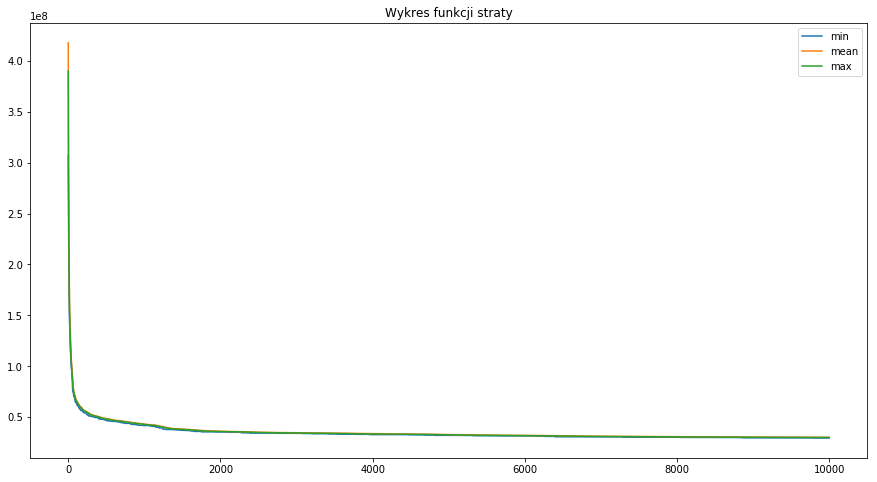

In [13]:
wdir = 'history/sga/'
best_chromosome = np.load(wdir + 'best_chromosome', allow_pickle=True)

best_chromosome = np.load(wdir + 'best_chromosome', allow_pickle=True)
obj_min_history = np.load(wdir + 'obj_min_history', allow_pickle=True)
obj_mean_history = np.load(wdir + 'obj_mean_history', allow_pickle=True)
obj_max_history = np.load(wdir + 'obj_max_history', allow_pickle=True)
iterations = len(obj_min_history)
plt.plot(np.arange(iterations), obj_min_history, label='min')
plt.plot(np.arange(iterations), obj_max_history, label='mean')
plt.plot(np.arange(iterations), obj_mean_history, label='max')
plt.title('Wykres funkcji straty')
plt.legend()
plt.gcf().set_size_inches(15, 8)
plt.show()

![Alt Text](sga.png)

 ## ES
Podstawowa wersja algorytmu ES (sigmy używane do mutacji) działała bardzo źle. Algorytm bardzo szybko utykał. Mutacje były zbyt duże, obejmowały za wiele wymiarów naraz, żeby udało się odnieść jakieś sukcesy.

 ## ES 2
W ES 2 postanowiliśmy nie używać sigm do mutacji. Wprowadziliśmy mutacje:
1. Przesunięcie wierzchołków trójkąta
2. Zmiana koloru trójkąta (w tym przezroczystości)
3. Wybór paru trójkątów i zamiana ich kolejności (z-index)
4. Reinicjalizacja wybranego trójkąta

Krzyżowanie następuje poprzez stworzenie maski obejmującej 50% losowych trójkątów. Pierwsze dziecko dziedziczy trójkąty od pierwszego rodzica zgodnie z maską, a od drugiego używając zanegowanej maski. Przy takim krzyżowaniu zachowana jest pozycja trójkątów (z-index).

Takie podejście nie doprowadziło jeszcze do satysfakcjonującego wyniku, algorytm utknął w końcowej fazie, gdy do optymalizacji są wymagane bardzo małe mutacje.

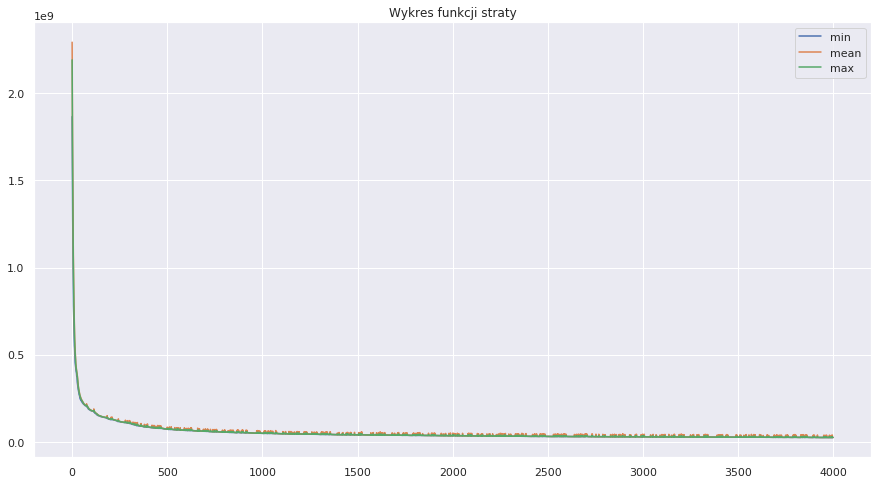

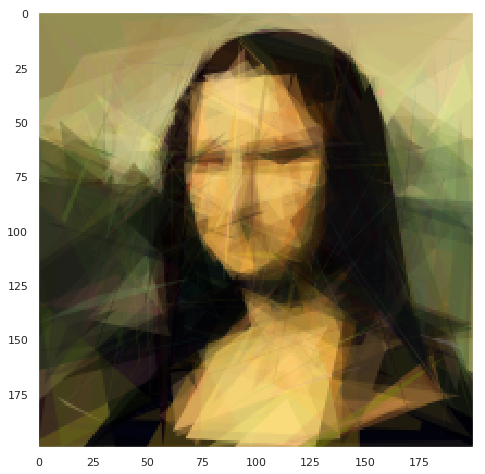

In [9]:
wdir = 'history/night/'
best_chromosome = np.load(wdir + 'es2_best_chromosome', allow_pickle=True)

best_chromosome = np.load(wdir + 'es2_best_chromosome', allow_pickle=True)
obj_min_history = np.load(wdir + 'es2_obj_min_history', allow_pickle=True)[:4000]
obj_mean_history = np.load(wdir + 'es2_obj_mean_history', allow_pickle=True)[:4000]
obj_max_history = np.load(wdir + 'es2_obj_max_history', allow_pickle=True)[:4000]
iterations = len(obj_min_history)
plt.plot(np.arange(iterations), obj_min_history, label='min')
plt.plot(np.arange(iterations), obj_max_history, label='mean')
plt.plot(np.arange(iterations), obj_mean_history, label='max')
plt.title('Wykres funkcji straty')
plt.legend()
plt.gcf().set_size_inches(15, 8)
plt.show()

es2_img = construct_image(best_chromosome, (200, 200), 3)
plt.imshow(es2_img)
plt.gcf().set_size_inches(8, 8)
plt.gca().grid(False)


 # Simple - 1 osobnik przeżywa, wiele dzieci (mutacji)
 W późniejszej fazie algorytmu crossover niewiele dawał. Osobniki były bardzo do siebie podobne.
 
 Dlatego zdecydowaliśmy się na algorytm, w którym tylko 1 osobnik z epoki przeżywa, a za pomocą mutacji powstaje z niego 50 osobników.
 
 Używamy dodatkowych parametrów, które dostosowują się w trakcie działania algorytmu, tak żeby utrzymać sukcesy na poziomie około 1 udanej mutacji na pokolenie, maksymalizując przy tym zasięg mutacji.
 
 Dostosowywane wg wzoru:

        success_rate = 0.9 * success_rate + 0.1 * successful / number_of_offspring
        rate *= (1 + (success_rate - 1. / number_of_offspring))

 Czyli gdy odnosimy wiele sukcesów, zwiększamy zasięg mutacji. Zmniejszamy gdy sukcesów jest mniej niż 1 na pokolenie.

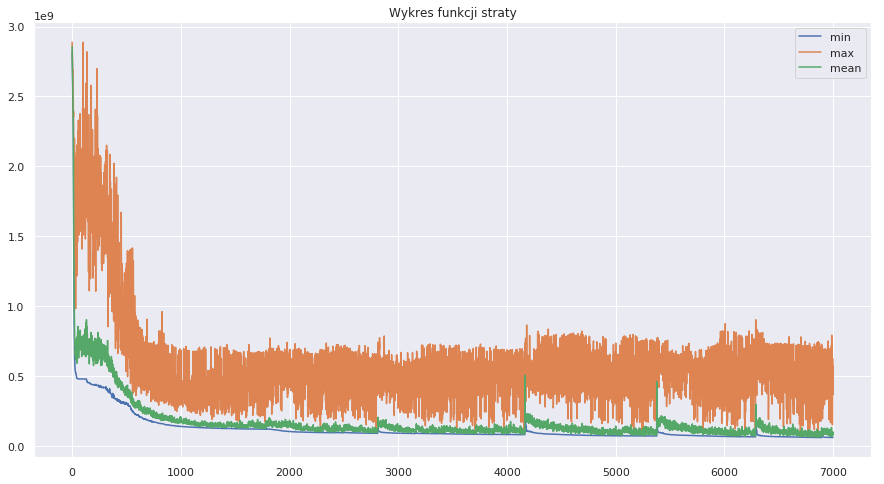

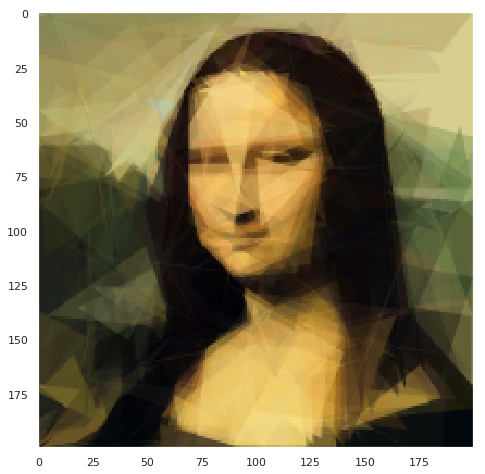

In [8]:

wdir = 'history/local/'
best_chromosome = np.load(wdir + 'best_chromosome', allow_pickle=True)

best_chromosome = np.load(wdir + 'best_chromosome', allow_pickle=True)
obj_min_history = np.load(wdir + 'obj_min_history', allow_pickle=True)[:7000]
obj_mean_history = np.load(wdir + 'obj_mean_history', allow_pickle=True)[:7000]
obj_max_history = np.load(wdir + 'obj_max_history', allow_pickle=True)[:7000]
iterations = len(obj_min_history)
plt.plot(np.arange(iterations), obj_min_history, label='min')
plt.plot(np.arange(iterations), obj_max_history, label='max')
plt.plot(np.arange(iterations), obj_mean_history, label='mean')
plt.legend()
plt.gcf().set_size_inches(15, 8)
plt.title('Wykres funkcji straty')
plt.show()

es2_img = construct_image(best_chromosome, (200, 200), 3)
plt.imshow(es2_img)
plt.gcf().set_size_inches(8, 8)
plt.gca().grid(False)
plt.show()

## Animacja ewolucji
![Alt Text](monalisa.gif)

# Szczegóły techniczne
W naszej implementacji do operacji na obrazkach / rysowania trójkątów użyliśmy biblioteki cairo.


Obliczenia do rozwiązania Simple (wyświetlony gif) zajęły około 7 godzin na komputerze z Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz.